In [34]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit , ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution
from qiskit.circuit.controlflow import IfElseOp

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

First Entangling the qubit to understand nicely the quantum teleportation and we for the first we are going to start by entangling the qubit

<div class = "alert block alert-success">
<b> SO BASICALLY FIRST THE THE TWO QUBIT ARE TAKEN AND THEN THE FIRST QUBIT IS MAKE TO SUPERPOSTION BY APPLYING THE HADAMARD GATE <B>
    <b> The CNOT Gate is use to entangled the qubit so it works on the target and control qubits , if the qubit is control <div>

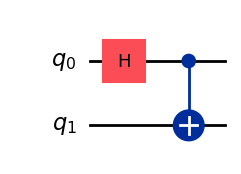

In [19]:
# Making the qubit in entangled state by using hadamard gate and cnot gate
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

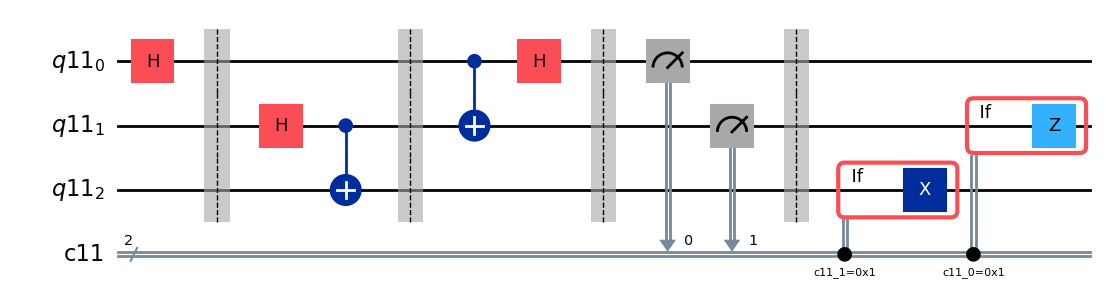

In [35]:

qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)


qc.h(qr[0])
qc.barrier()


qc.h(qr[1])
qc.cx(qr[1], qr[2])
qc.barrier()

qc.cx(qr[0],qr[1])
qc.h(qr[0])
qc.barrier()

qc.measure(qr[0] , cr[0])
qc.measure(qr[1] , cr[1])
qc.barrier()

with qc.if_test((cr[1],1)):
    qc.x(qr[2])
with qc.if_test((cr[0] , 1)):
    qc.z(qr[1])


qc.draw('mpl')